Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'movies.csv'

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [4]:
# List of columns to remove
columns_to_remove = ['homepage', 'keywords', 'original_language', 'original_title', 
                     'overview', 'production_companies', 'status', 'tagline']

# Drop the specified columns
movies_df = movies_df.drop(columns=columns_to_remove)

# Display the updated dataframe
print(movies_df.head())


      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

   popularity                               production_countries release_date  \
0  150.437577  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  139.082615  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
3  112.312950  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
4   43.926995  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

      revenue  runtime                                   spoke

#### Remove any duplicate rows

In [5]:
movies_df = movies_df.drop_duplicates()

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [ ]:
# Check for missing values
print(movies_df.isnull().sum())

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [6]:
# Change the release_date column to DateTime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year

# Display the updated dataframe
print(movies_df.head())

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

   popularity                               production_countries release_date  \
0  150.437577  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  139.082615  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
3  112.312950  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
4   43.926995  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

      revenue  runtime                                   spoke

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [7]:
# Change the budget column to int64
movies_df['budget'] = movies_df['budget'].astype(np.int64)

# Change the revenue column to int64
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

# Display the updated dataframe
print(movies_df.head())

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

   popularity                               production_countries release_date  \
0  150.437577  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  139.082615  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
3  112.312950  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
4   43.926995  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

      revenue  runtime                                   spoke

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [8]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [9]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
4173,1800000,"['Drama', 'Comedy', 'War']",935,41.996783,"['United Kingdom', 'United States of America']",1964-01-29,9440272,95.0,['English'],Dr. Strangelove or: How I Learned to Stop Worr...,8.0,1442,1964.0


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [10]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('Action', case=False, na=False)]

# Display the dataframe with Action genre movies
print(action_movies.head())

      budget                                             genres      id  \
0  237000000  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   19995   
1  300000000                 ['Adventure', 'Fantasy', 'Action']     285   
2  245000000                   ['Action', 'Adventure', 'Crime']  206647   
3  250000000           ['Action', 'Crime', 'Drama', 'Thriller']   49026   
4  260000000         ['Action', 'Adventure', 'Science Fiction']   49529   

   popularity                            production_countries release_date  \
0  150.437577  ['United States of America', 'United Kingdom']   2009-12-10   
1  139.082615                    ['United States of America']   2007-05-19   
2  107.376788  ['United Kingdom', 'United States of America']   2015-10-26   
3  112.312950                    ['United States of America']   2012-07-16   
4   43.926995                    ['United States of America']   2012-03-07   

      revenue  runtime                                   spoken_languages  \
0  

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [12]:
# Identify the 5 most expensive movies
most_expensive_movies = movies_df.nlargest(5, 'budget')[['title', 'budget', 'revenue', 'release_year']]
print("5 Most Expensive Movies:")
print(most_expensive_movies)

# Identify the cheapest movies
cheapest_movies = movies_df.nsmallest(5, 'budget')[['title', 'budget', 'revenue', 'release_year']]
print("\n5 Cheapest Movies:")
print(cheapest_movies)

# Compare the most expensive and cheapest movies
expensive_vs_cheapest = pd.concat([most_expensive_movies, cheapest_movies], keys=['Most Expensive', 'Cheapest'])
print("\nComparison of Most Expensive and Cheapest Movies:")
print(expensive_vs_cheapest)


5 Most Expensive Movies:
                                          title     budget     revenue  \
17  Pirates of the Caribbean: On Stranger Tides  380000000  1045713802   
1      Pirates of the Caribbean: At World's End  300000000   961000000   
7                       Avengers: Age of Ultron  280000000  1405403694   
10                             Superman Returns  270000000   391081192   
4                                   John Carter  260000000   284139100   

    release_year  
17        2011.0  
1         2007.0  
7         2015.0  
10        2006.0  
4         2012.0  

5 Cheapest Movies:
                                      title  budget    revenue  release_year
265                      The Cat in the Hat       0          0        2003.0
321                            The Campaign       0  104907746        2012.0
359  Alvin and the Chipmunks: The Road Chip       0  233755553        2015.0
406                        Arthur Christmas       0          0        2011.0
409        

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [13]:
# Calculate profit for each movie (revenue - budget)
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Identify the top 5 most profitable movies
most_profitable_movies = movies_df.nlargest(5, 'profit')[['title', 'budget', 'revenue', 'profit', 'release_year']]
print("Top 5 Most Profitable Movies:")
print(most_profitable_movies)

# Identify the least profitable movies
least_profitable_movies = movies_df.nsmallest(5, 'profit')[['title', 'budget', 'revenue', 'profit', 'release_year']]
print("\nTop 5 Least Profitable Movies:")
print(least_profitable_movies)

# Compare the minimum and maximum profits
min_max_profit_comparison = pd.concat([most_profitable_movies, least_profitable_movies], keys=['Most Profitable', 'Least Profitable'])
print("\nComparison of Most and Least Profitable Movies:")
print(min_max_profit_comparison)

Top 5 Most Profitable Movies:
             title     budget     revenue      profit  release_year
0           Avatar  237000000  2787965087  2550965087        2009.0
25         Titanic  200000000  1845034188  1645034188        1997.0
28  Jurassic World  150000000  1513528810  1363528810        2015.0
44       Furious 7  190000000  1506249360  1316249360        2015.0
16    The Avengers  220000000  1519557910  1299557910        2012.0

Top 5 Least Profitable Movies:
                     title     budget   revenue     profit  release_year
13         The Lone Ranger  255000000  89289910 -165710090        2013.0
135            The Wolfman  150000000         0 -150000000        2010.0
338              The Alamo  145000000  25819961 -119180039        2004.0
141        Mars Needs Moms  150000000  38992758 -111007242        2011.0
1652  Dragonball Evolution  100000000         0 -100000000        2009.0

Comparison of Most and Least Profitable Movies:
                                      title

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [14]:
# Find the most popular movies
most_popular_movies = movies_df.nlargest(5, 'popularity')[['title', 'popularity', 'release_year']]
print("Top 5 Most Popular Movies:")
print(most_popular_movies)

# Sort the dataframe based on the 'popularity' column
sorted_by_popularity = movies_df.sort_values(by='popularity', ascending=False)
print("\nMovies Sorted by Popularity:")
print(sorted_by_popularity[['title', 'popularity', 'release_year']].head())

Top 5 Most Popular Movies:
                       title  popularity  release_year
546                  Minions  875.581305        2015.0
95              Interstellar  724.247784        2014.0
788                 Deadpool  514.569956        2016.0
94   Guardians of the Galaxy  481.098624        2014.0
127       Mad Max: Fury Road  434.278564        2015.0

Movies Sorted by Popularity:
                       title  popularity  release_year
546                  Minions  875.581305        2015.0
95              Interstellar  724.247784        2014.0
788                 Deadpool  514.569956        2016.0
94   Guardians of the Galaxy  481.098624        2014.0
127       Mad Max: Fury Road  434.278564        2015.0


#### Find Movies which are rated above 7

In [15]:
# Find movies rated above 7
high_rated_movies = movies_df[movies_df['vote_average'] > 7][['title', 'vote_average', 'release_year']]
print("Movies Rated Above 7:")
print(high_rated_movies)

Movies Rated Above 7:
                                       title  vote_average  release_year
0                                     Avatar           7.2        2009.0
3                      The Dark Knight Rises           7.6        2012.0
6                                    Tangled           7.4        2010.0
7                    Avengers: Age of Ultron           7.3        2015.0
8     Harry Potter and the Half-Blood Prince           7.4        2009.0
...                                      ...           ...           ...
4755                                Counting           8.3        2015.0
4766                          The Last Waltz           7.9        1978.0
4773                                  Clerks           7.4        1994.0
4792                                    Cure           7.4        1997.0
4797                                  Cavite           7.5        2005.0

[809 rows x 3 columns]


#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

Before Conversion:
0    [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...
1    [{"id": 14, "name": "Fantasy"}, {"id": 35, "na...
2    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
Name: genres, dtype: object

Genre ID Counts:
14    2
28    2
18    2
12    1
35    1
80    1
Name: count, dtype: int64


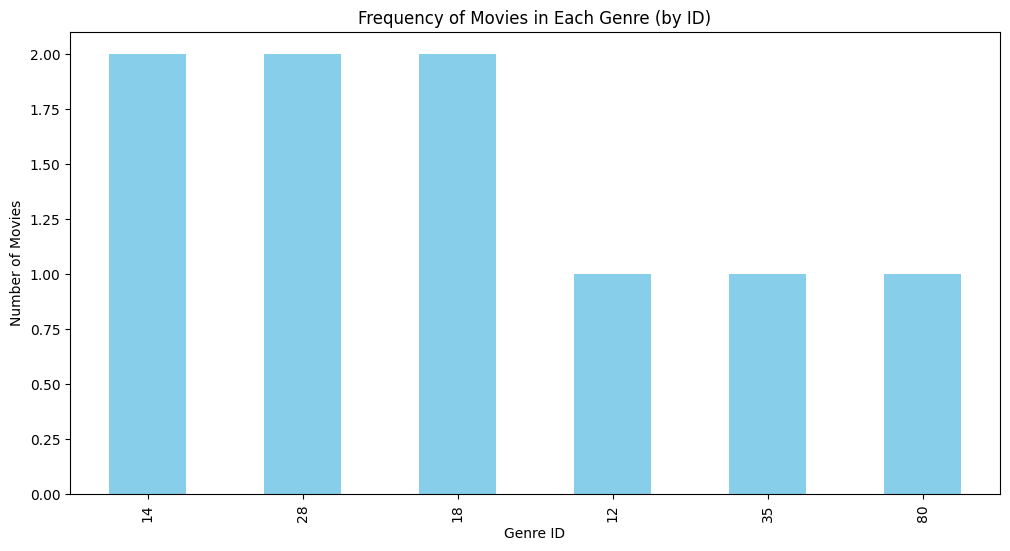

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'title': ['Movie 1', 'Movie 2', 'Movie 3'],
        'genres': ['[{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]',
                   '[{"id": 14, "name": "Fantasy"}, {"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]',
                   '[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}]']}

movies_df = pd.DataFrame(data)

# Print the 'genres' column before conversion
print("Before Conversion:")
print(movies_df['genres'].head())

# Convert 'genres' column to a list of lists
movies_df['genres'] = movies_df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Function to extract genre IDs
def extract_genre_ids(genres_list):
    if isinstance(genres_list, list):
        return [genre['id'] for genre in genres_list]
    return []

# Apply the function to create a new column 'genre_ids'
movies_df['genre_ids'] = movies_df['genres'].apply(extract_genre_ids)

# Flatten the genre_ids list and count the frequency of each genre ID
all_genre_ids = [genre_id for genre_ids_list in movies_df['genre_ids'] for genre_id in genre_ids_list]
genre_id_counts = pd.Series(all_genre_ids).value_counts()

# Display the genre ID counts
print("\nGenre ID Counts:")
print(genre_id_counts)

# Create a bar plot for genre ID frequencies
plt.figure(figsize=(12, 6))
genre_id_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Movies in Each Genre (by ID)')
plt.xlabel('Genre ID')
plt.ylabel('Number of Movies')
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the dataset
df = pd.read_csv('movies.csv')

# Plot genre distribution
genre_counts = df['Genre'].value_counts()
genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Genre Distribution of Movies')
plt.show()

# Convert 'Release Year' to datetime
df['Release Year'] = pd.to_datetime(df['Release Year'], format='%Y')

# Plot box office revenue over time
plt.figure(figsize=(10, 6))
df.groupby('Release Year')['Box Office Revenue'].sum().plot(marker='o')
plt.title('Box Office Revenue Over Time')
plt.xlabel('Release Year')
plt.ylabel('Total Box Office Revenue (in billions)')
plt.show()

# Plot rating vs. runtime
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Runtime', data=df, alpha=0.7)
plt.title('Rating vs. Runtime')
plt.xlabel('Rating')
plt.ylabel('Runtime (minutes)')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'movies.csv'